In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints, Pillbox
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


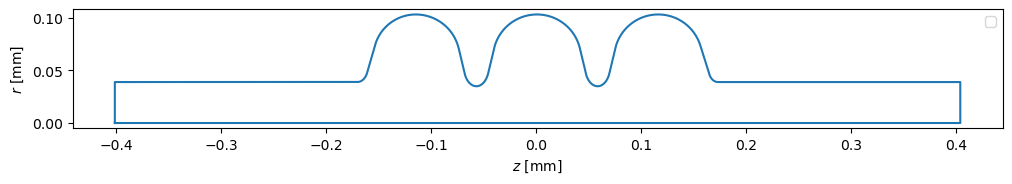

In [2]:
cavs = Cavities([])
# must first save cavities
cavs.save(files_path='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
midcell = np.array([42, 42, 12, 19, 35, 57.7, 100])
endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])
# create cavity
cav0 = Cavity(3, midcell, endcell_l, endcell_r, beampipe='both')
ax = cav0.plot('geometry')

# add cavity to cavities
cavs.add_cavity(cav0, 'tesla')

In [3]:
# run sweep
sweep_config = {
    'A': [30, 50, 3]
}

cavs.sweep(sweep_config)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Done with Cavity tesla. Time: 14.378297328948975


  0%|          | 0/1 [00:00<?, ?it/s]

Done with Cavity tesla. Time: 12.789709568023682


  0%|          | 0/1 [00:00<?, ?it/s]

Parameter set leads to degenerate geometry.
Could not run eigenmode analysis due to error in geometry.
Done with Cavity tesla. Time: 0.0069887638092041016
Could not find eigenmode results. Please rerun eigenmode analysis.


In [6]:
import pandas as pd
cavs.sweep_results['tesla']
sr = pd.DataFrame.from_dict(cavs.sweep_results['tesla']['A']).T

<Axes: >

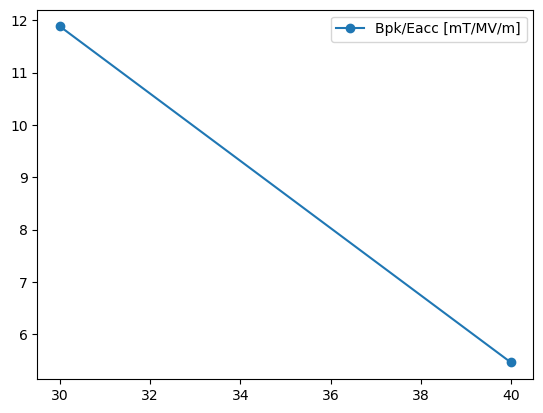

In [5]:
sr[['Bpk/Eacc [mT/MV/m]']].plot(marker='o')